In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from ase.build import bulk, fcc111

In [3]:
from ase.optimize import BFGS, FIRE
from ase.filters import FrechetCellFilter

In [4]:
from ase.visualize import view

In [5]:
element='Au'

# GPU: Tensorpotential calculator

In [6]:
from tensorpotential.calculator import TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-28 12:55:33.326849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772279733.337913 1188537 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772279733.341272 1188537 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772279733.350287 1188537 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772279733.350296 1188537 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772279733.350298 1188537 computation_placer.cc:177] computation placer alr

In [7]:
calc_tp = TPCalculator("../1-fit/seed/1/final_model/")

2026-02-28 12:55:41.658577: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### FCC bulk

In [8]:
fcc_bulk = bulk(element,"fcc")
fcc_bulk

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])

In [9]:
fcc_bulk.calc=calc_tp

In [10]:
fcc_bulk.get_potential_energy()

I0000 00:00:1772279742.251906 1188537 service.cc:152] XLA service 0x10d15a10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772279742.251939 1188537 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-28 12:55:42.439542: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772279743.771580 1188537 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


np.float64(-3.9360805103679235)

In [11]:
fcc_bulk.get_stress()

array([-1.07100173e-02, -1.07100173e-02, -1.07100173e-02,  2.11485260e-17,
       -6.33434112e-18, -1.32816830e-17])

In [12]:
FIRE(FrechetCellFilter(fcc_bulk)).run()

      Step     Time          Energy          fmax
FIRE:    0 12:55:43       -3.936081        0.181849
FIRE:    1 12:55:43       -3.936837        0.095905
FIRE:    2 12:55:43       -3.937104        0.030866


np.True_

### FCC(111) surface

In [13]:
fcc_111_surface = fcc111(element, size=(2,2,10), periodic=True, vacuum=10)
fcc_111_surface

Atoms(symbols='Au40', pbc=True, cell=[[5.769991334482229, 0.0, 0.0], [2.8849956672411143, 4.996959075277683, 0.0], [0.0, 0.0, 41.20030188464305]], tags=...)

In [14]:
# view(Ir_surface)

In [15]:
fcc_111_surface.calc=calc_tp

In [16]:
fcc_111_surface.get_potential_energy()

np.float64(-152.27884680626136)

In [17]:
BFGS(FrechetCellFilter(fcc_111_surface)).run()

      Step     Time          Energy          fmax
BFGS:    0 12:55:45     -152.278847        0.233500
BFGS:    1 12:55:45     -152.283840        0.225618
BFGS:    2 12:55:45     -152.311538        0.145778
BFGS:    3 12:55:45     -152.313632        0.132519
BFGS:    4 12:55:45     -152.318848        0.099799
BFGS:    5 12:55:45     -152.323128        0.076249
BFGS:    6 12:55:45     -152.326363        0.066139
BFGS:    7 12:55:45     -152.327674        0.064768
BFGS:    8 12:55:45     -152.328695        0.066199
BFGS:    9 12:55:45     -152.330232        0.064013
BFGS:   10 12:55:45     -152.331905        0.054146
BFGS:   11 12:55:45     -152.333196        0.042427


np.True_

Some initial slowdown during the first few steps is due to JIT recompilation of the model, triggered by changes in the number of neighbors. However, thanks to padding, recompilations will only occur when a new padding size is required.

You can adjust these padding settings with the following options (at the cost of slightly increased overhead):

```python
calc_tp_with_more_padding = TPCalculator("../1-fit/seed/1/saved_model/",
                                         pad_neighbors_fraction=0.2, # pad up to 20% extra neighbours
                                         pad_atoms_number=5 # pad up to 5 extra atoms
                                        )
```

# CPU: GRACE/FS calculator (with extrapolation grade)

In [18]:
from pyace.asecalc import PyGRACEFSCalculator

In [19]:
calc_fs=PyGRACEFSCalculator("../1-fit/seed/1/saved_model.yaml")

### FCC bulk

In [20]:
fcc_bulk = bulk(element,"fcc")
fcc_bulk

Atoms(symbols='Au', pbc=True, cell=[[0.0, 2.04, 2.04], [2.04, 0.0, 2.04], [2.04, 2.04, 0.0]])

In [21]:
fcc_bulk.calc=calc_fs

In [22]:
fcc_bulk.get_potential_energy()

-3.9360805103765477

In [23]:
fcc_bulk.get_stress()

array([-1.07100173e-02, -1.07100173e-02, -1.07100173e-02, -4.44425546e-18,
        2.29875283e-18,  1.58557957e-18])

In [24]:
FIRE(FrechetCellFilter(fcc_bulk)).run()

      Step     Time          Energy          fmax
FIRE:    0 12:55:46       -3.936081        0.181849
FIRE:    1 12:55:46       -3.936837        0.095905
FIRE:    2 12:55:46       -3.937104        0.030866


np.True_

### FCC(111) surface

In [25]:
fcc_111_surface = fcc111(element, size=(2,2,10), periodic=True, vacuum=10)
fcc_111_surface

Atoms(symbols='Au40', pbc=True, cell=[[5.769991334482229, 0.0, 0.0], [2.8849956672411143, 4.996959075277683, 0.0], [0.0, 0.0, 41.20030188464305]], tags=...)

In [26]:
fcc_111_surface.calc=calc_fs

In [27]:
fcc_111_surface.get_potential_energy()

-152.27884680788907

In [28]:
BFGS(FrechetCellFilter(fcc_111_surface)).run()

      Step     Time          Energy          fmax
BFGS:    0 12:55:46     -152.278847        0.233500
BFGS:    1 12:55:46     -152.283840        0.225618
BFGS:    2 12:55:46     -152.311538        0.145778
BFGS:    3 12:55:46     -152.313632        0.132519
BFGS:    4 12:55:46     -152.318848        0.099799
BFGS:    5 12:55:46     -152.323128        0.076249
BFGS:    6 12:55:46     -152.326363        0.066139
BFGS:    7 12:55:46     -152.327674        0.064768
BFGS:    8 12:55:46     -152.328695        0.066199
BFGS:    9 12:55:46     -152.330232        0.064013
BFGS:   10 12:55:46     -152.331905        0.054146
BFGS:   11 12:55:46     -152.333196        0.042427


np.True_

## Extrapolation grade gamma

one need to set active set (ASI), computed previously with `pace_activeset` utility

In [29]:
calc_fs.set_active_set("../1-fit/seed/1/saved_model.asi")

### FCC

In [30]:
fcc_bulk.calc=calc_fs

In [31]:
fcc_bulk.get_potential_energy()

-3.937104350058264

In [32]:
fcc_bulk.calc.results['gamma']

array([0.69071764])

bulk atoms are in interpolation regime ($\gamma<\approx1$)

Let us consider E-lattice constant curve with extrapolation grade

In [33]:
a_list=np.linspace(1.0, 8, num=75)

energy_list=[]
gamma_list=[]

for a in a_list:
    at = bulk(element,"fcc",a=a)
    at.calc=calc_fs
    
    e=at.get_potential_energy()
    gamma=at.calc.results['gamma'].max()
    
    energy_list.append(e)
    gamma_list.append(gamma)

In [34]:
gamma_list=np.array(gamma_list)

energy_list=np.array(energy_list)

mask = gamma_list<=1.1 # interpolation region

Text(0, 0.5, 'Gamma')

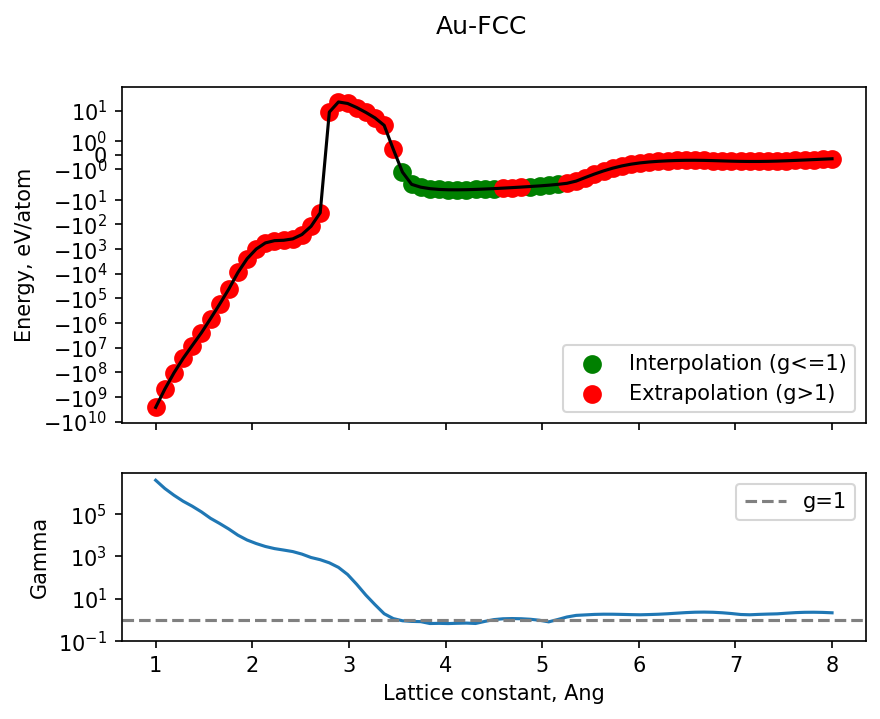

In [35]:
fig, axs= plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios = [2,1], dpi=150)

fig.suptitle(element+"-FCC")
#### energy ###
axs[0].plot(a_list, energy_list, color='black')
axs[0].scatter(a_list[mask], energy_list[mask], lw=3, color="green", label='Interpolation (g<=1)')
axs[0].scatter(a_list[~mask], energy_list[~mask], lw=3, color="red", label='Extrapolation (g>1)')

axs[0].legend()
axs[0].set_yscale('symlog')
axs[0].set_ylabel("Energy, eV/atom")

#### gamma ###
axs[1].plot(a_list, gamma_list)
axs[1].set_yscale('log');
axs[1].set_xlabel("Lattice constant, Ang")


axs[1].axhline(1.0, ls='--', color='gray', label='g=1')
axs[1].legend()
axs[1].set_ylim(0.1, None)
axs[1].set_ylabel("Gamma")

### FCC(111) surface

In [36]:
fcc_111_surface.calc=calc_fs

In [37]:
fcc_111_surface.get_potential_energy()

-152.33319625638904

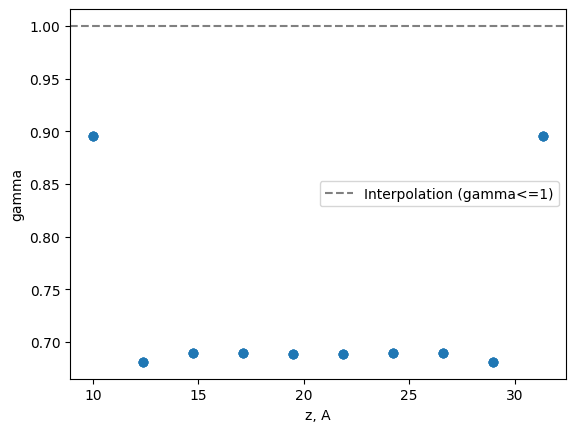

In [38]:
plt.scatter(fcc_111_surface.positions[:,2], calc_fs.results['gamma'])
plt.xlabel("z, A")
plt.ylabel("gamma")
plt.axhline(1.0, ls="--", color='gray', label='Interpolation (gamma<=1)')
plt.legend()

Since our training dataset for this particular tutorial contains only bulk-like structures, surface atoms are in extrapolation regime ($\gamma>1$), bulk atoms are in interpolation regime ($\gamma<=1$)